In [1]:
# 1. Load Libraries and Data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [2]:
df = pd.read_csv('Customer-Churn-Records.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [3]:
# 2. Data Cleaning
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
print(df.info())
print(df.isnull().sum())

cat_cols = df.select_dtypes('object').columns
print({col: df[col].unique() for col in cat_cols})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

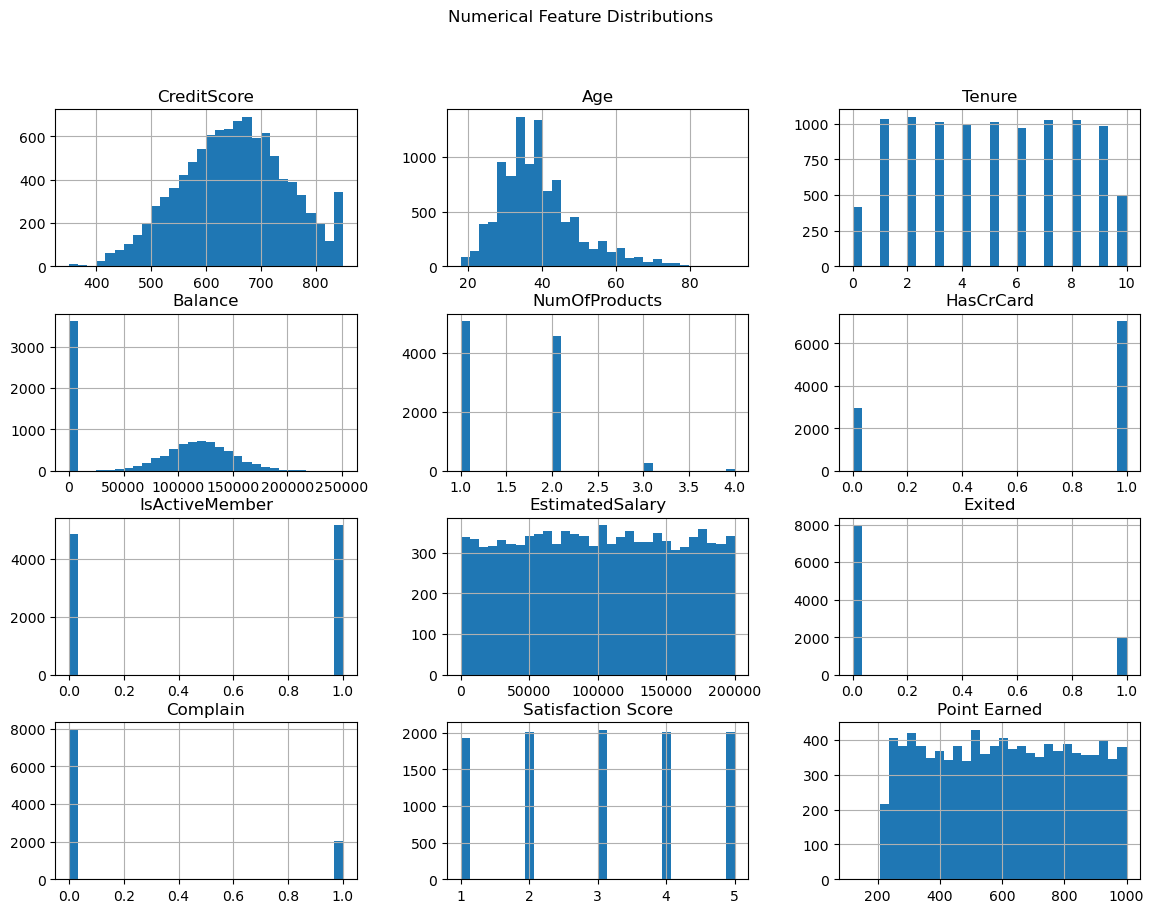

In [4]:
# 3. Univariate EDA
# Numerical histograms
df.hist(figsize=(14,10), bins=30)
plt.suptitle('Numerical Feature Distributions')
plt.show()

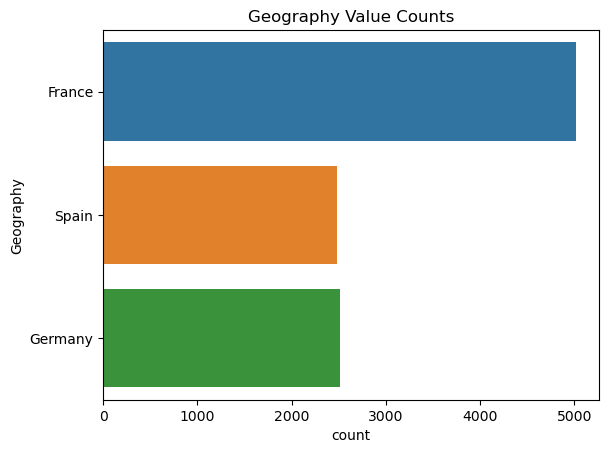

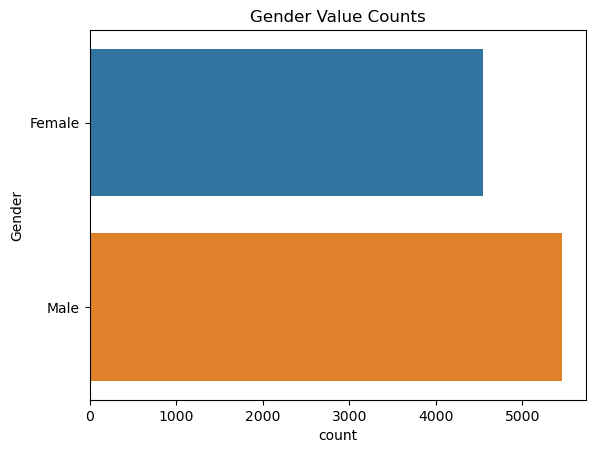

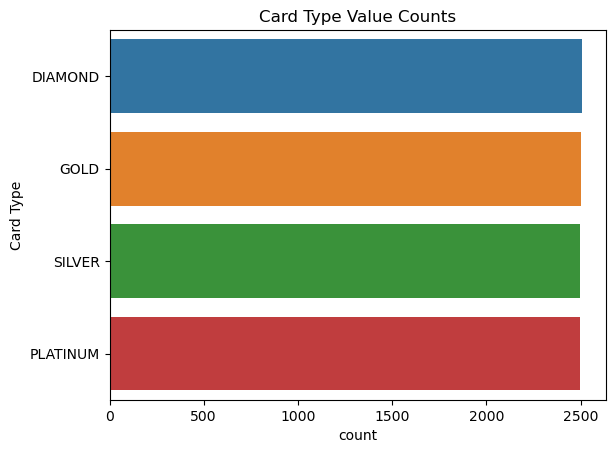

In [5]:

# Categorical counts
for col in cat_cols:
    sns.countplot(y=col, data=df)
    plt.title(f'{col} Value Counts')
    plt.show()

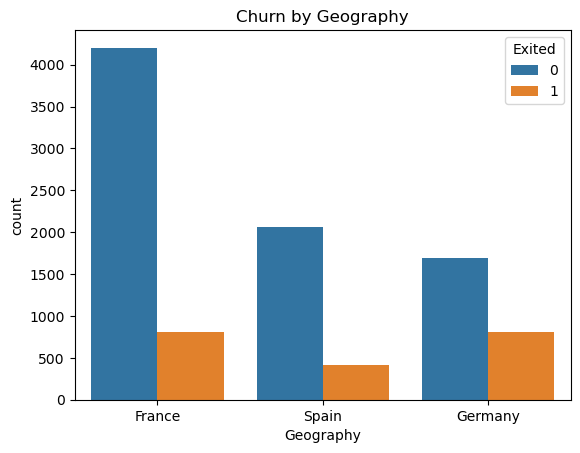

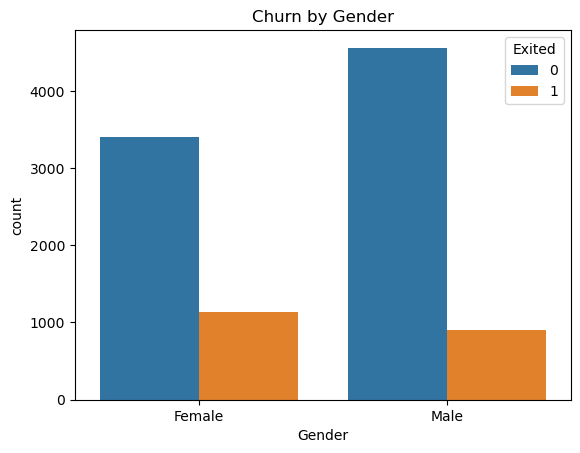

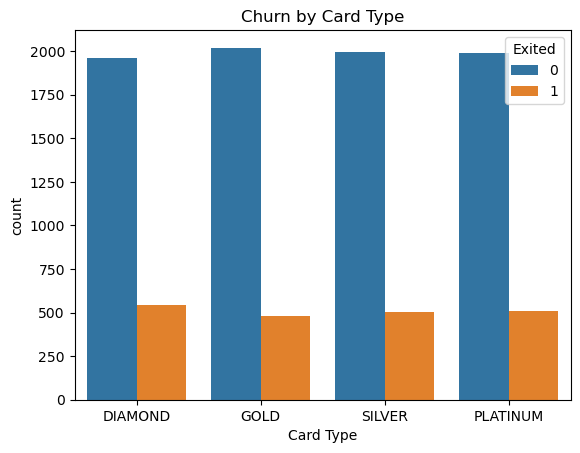

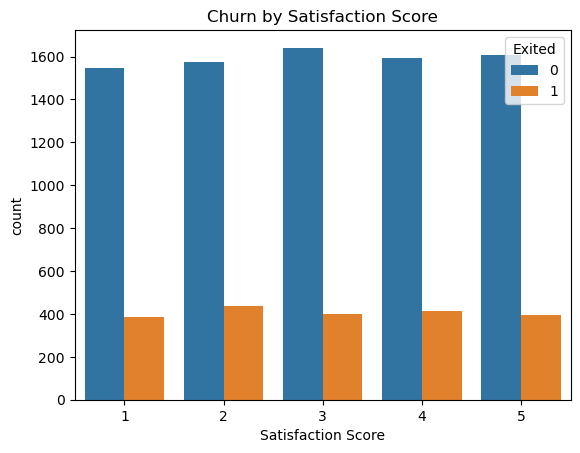

In [6]:
# 4. Churn Rate Segmented EDA
seg_cats = ['Geography', 'Gender', 'Card Type', 'Satisfaction Score']
for col in seg_cats:
    sns.countplot(x=col, hue='Exited', data=df)
    plt.title(f'Churn by {col}')
    plt.show()

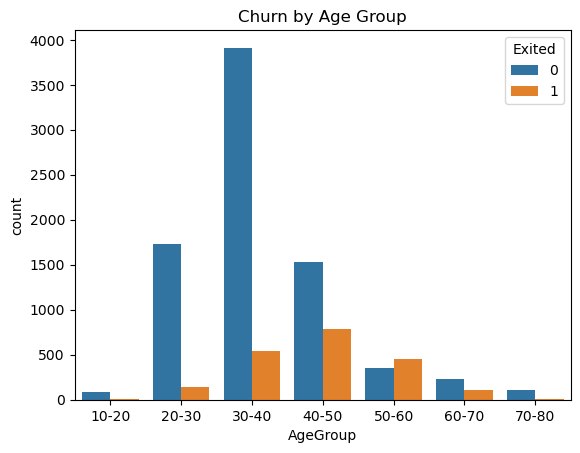

In [8]:

# 7. Churn by Age Bins
df['AgeGroup'] = pd.cut(df['Age'], bins=[10,20,30,40,50,60,70,80], labels=['10-20','20-30','30-40','40-50','50-60','60-70','70-80'])
sns.countplot(x='AgeGroup', hue='Exited', data=df)
plt.title('Churn by Age Group')
plt.show()

C:\Users\amith\AppData\Local\Temp\ipykernel_6128\4261851277.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


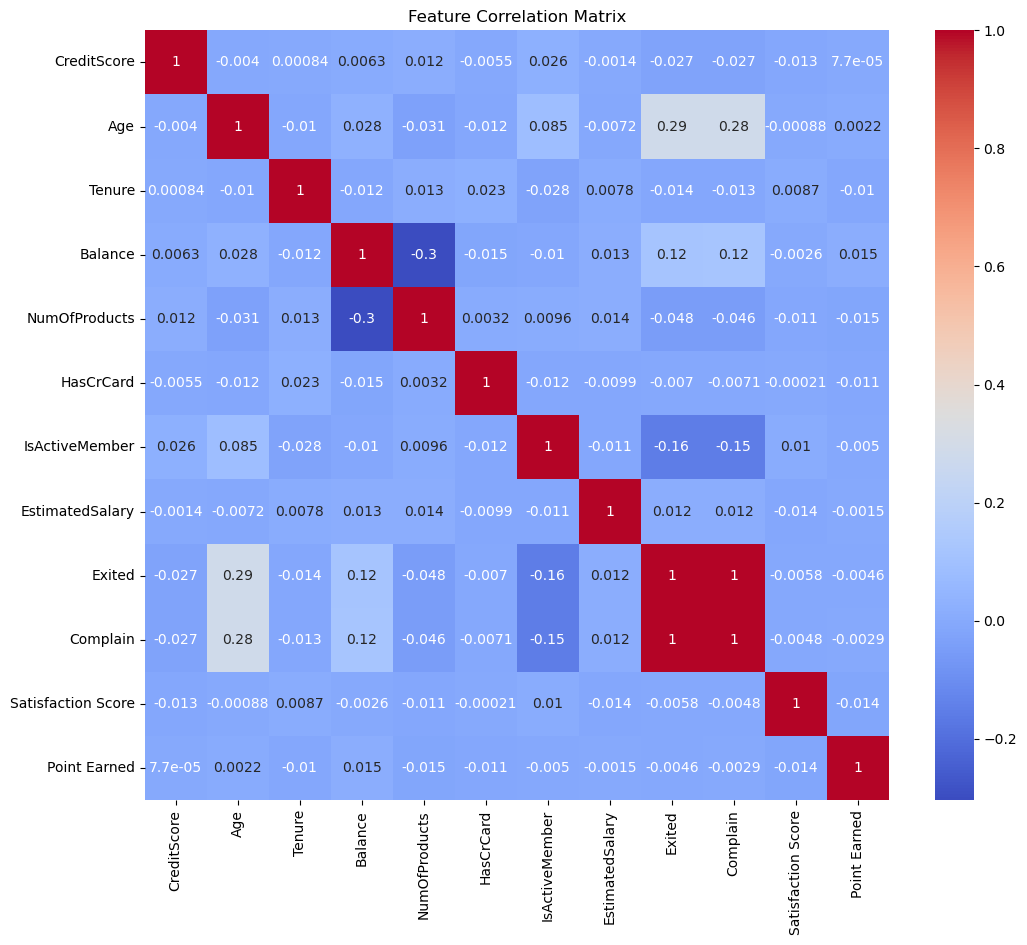

In [9]:
# 8. Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()


In [16]:
# 9. Prepare Data for Modeling
X = df.drop(['Exited', 'AgeGroup'], axis=1)
y = df['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
cat_cols = df.select_dtypes('object').columns.tolist()
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))

X = df.drop(['Exited', 'AgeGroup'], axis=1)
y = df['Exited']

In [19]:

# 10. Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
proba = clf.predict_proba(X_test)[:,1]

In [20]:
# 11. Evaluation
print("Classification Report:\n", classification_report(y_test, pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("ROC AUC Score:", roc_auc_score(y_test, proba))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1607
           1       1.00      1.00      1.00       393

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
 [[1606    1]
 [   1  392]]
ROC AUC Score: 0.9996730271981201


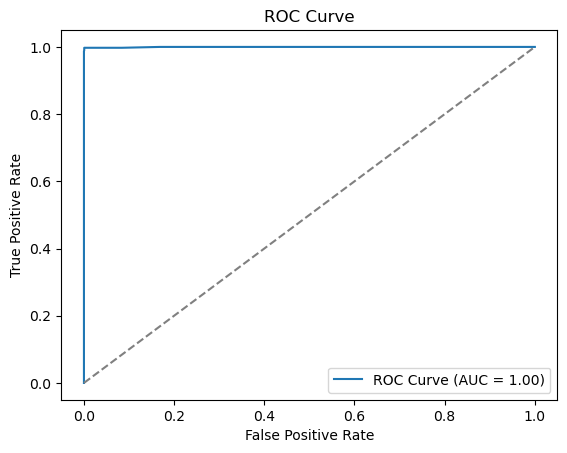

In [21]:
# 12. ROC Curve
fpr, tpr, _ = roc_curve(y_test, proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(roc_auc_score(y_test, proba)))
plt.plot([0,1], [0,1], '--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC Curve')
plt.show()


Top 10 Feature Importances:
 Complain           0.822939
Age                0.054823
NumOfProducts      0.050133
IsActiveMember     0.014619
Balance            0.013688
CreditScore        0.008302
EstimatedSalary    0.008254
Point Earned       0.008162
Geography          0.004867
Tenure             0.004772
dtype: float64


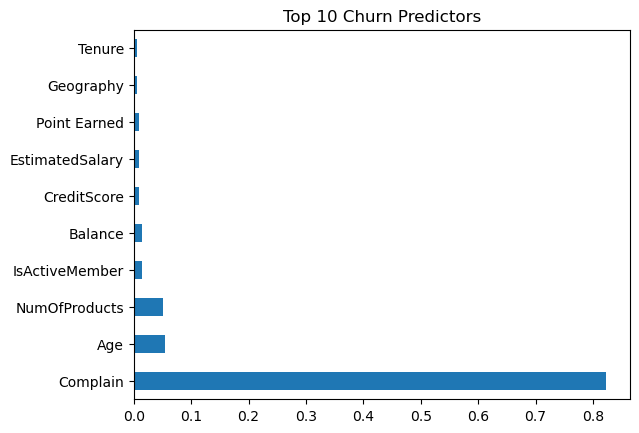

In [22]:
# 13. Feature Importances
feat_imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Top 10 Feature Importances:\n', feat_imp.head(10))
feat_imp.head(10).plot(kind='barh')
plt.title('Top 10 Churn Predictors')
plt.show()